## 5-1 如何使用Keras 打造神經網路

** Keras 預建神經層類型 **

* 多層感知器(MLP) : 之前都是在說這個
* 卷積神經網路(CNN) : 做影像識別很準
* 循環神經網路(RNN) : 做NLP



In [6]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 

import pandas as pd

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [15]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)


# 定義模型
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_14

**Dense** 

全連結層,在Keran的架構叫 Dense

In [18]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary() # 顯示模型摘要資訊 

# 編譯模型, 優化器使用sgd
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_23

In [19]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)  # one-hot encoding分類

# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Epoch 1/150
768/768 [==============================] - 1s 884us/step - loss: 0.6597 - acc: 0.6302
Epoch 2/150
768/768 [==============================] - 0s 186us/step - loss: 0.6486 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 171us/step - loss: 0.6480 - acc: 0.6510


In [20]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Epoch 1/150
768/768 [==============================] - 1s 924us/step - loss: 0.6621 - acc: 0.6146
Epoch 2/150
768/768 [==============================] - 0s 227us/step - loss: 0.6337 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 202us/step - loss: 0.5983 - acc: 0.6510


### 5-2-3 調整你的神經網路-減少神經網路的參數量, P5-17



In [2]:
# 5-2-1 認識皮馬印地安人的糖尿病資料 
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10) # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")

print(df.head())
print(df.shape)

dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料 

# 分割成特徵資料與標籤資料
X = dataset[:,0:8]
Y = dataset[:,8]

# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot encoding
Y = to_categorical(Y)

# 定義模型, 隱藏層可以調整
model = Sequential()
model.add(Dense(20, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(6, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
#model.summary() # 顯示模型摘要資訊 

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 訓練模型
model.fit(X,Y, epochs=150, batch_size=10)

# 評估模型
loss,accuracy = model.evaluate(X,Y)
print("準確度 = {:.2f}".format(accuracy))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Epoch 1/150
768/768 [==============================] - 0s 650us/step - loss: 0.6596 - acc: 0.6224
Epoch 2/150
768/768 [==============================] - 0s 176us/step - loss: 0.6200 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 179us/step - loss: 0.5627 - acc: 0.6979


### 5-2-4 使用測試與驗證資料集-說明

p5-18


In [4]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


訓練資料集的準確度 = 0.82
測試資料集的準確度 = 0.73


p5-19 在訓練模型時使用驗證資料集(手動分割)

In [5]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                    epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


訓練資料集的準確度 = 0.84
測試資料集的準確度 = 0.68


訓練資料集的準確度 = 0.85
測試資料集的準確度 = 0.71


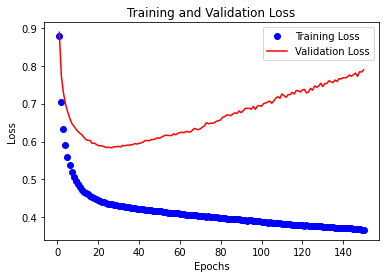

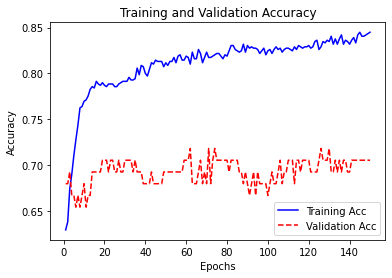

In [7]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                    epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo",label="Training Loss")
plt.plot(epochs, val_loss, "r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-",label="Training Acc")
plt.plot(epochs, val_acc, "r--",label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

訓練資料集的準確度 = 0.79
測試資料集的準確度 = 0.71


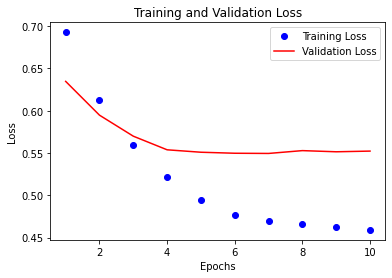

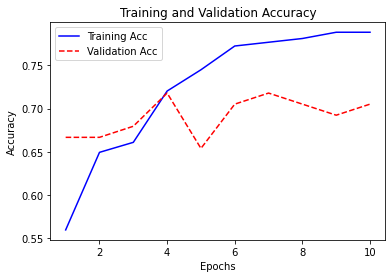

In [8]:
# Ch5_2_4.py
# 將資料集分割成訓練和測試資料集
# epochs調成10次

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690],Y[:690]    # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                    epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo",label="Training Loss")
plt.plot(epochs, val_loss, "r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(loss)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-",label="Training Acc")
plt.plot(epochs, val_acc, "r--",label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 5-3 認識線性迴歸 Linear Regression

P5-27

## 5-4 打造迴歸問題的神經網路-波士頓房價預測

### 5-4-1 認識波士頓房屋資料集



In [10]:
import pandas as pd

df = pd.read_csv("./boston_housing.csv")

print(df.head())
print(df.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 14)


p5-31
資料量少的時候, 可以使用 K-fold 交叉驗證

In [11]:
#Ch5_4_2.py
#建立迴歸分析的神經網路
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
def build_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(1))
    # 編譯模型(mse)
    model.compile(loss="mse", optimizer="adam", 
                  metrics=["mae"])
    return model

k = 4
nb_val_samples = len(X_train) // k
nb_epochs = 80
mse_scores = []
mae_scores = []
for i in range(k):
    print("Processing Fold #" + str(i))
    # 取出驗證資料集
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    # 結合出訓練資料集
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model()
    # 訓練模型
    model.fit(X_train_p, Y_train_p, epochs=nb_epochs, 
              batch_size=16, verbose=0)
    # 評估模型
    mse, mae = model.evaluate(X_val, Y_val, verbose=0)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test, verbose=0)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)


Processing Fold #0
Processing Fold #1
Processing Fold #2
Processing Fold #3
MSE_val:  27.046437225719494
MAE_val:  3.6666083
MSE_test:  15.541310179467295
MAE_test:  3.1938043


## 5-5 儲存與載入神經網路模型

自己看